# Quality control
<b> Mai-Linh Ton </b>

In [1]:
library(Matrix)
library(biomaRt)
library(ggplot2)
library(knitr)
library(scales)
library(viridis)
library(cowplot)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
#core functions inc. colour palette
source("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/normalisation/core_functions.R")

counts = readMM("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/2_cellcalling/raw_counts_trimmed.mtx")
genes = read.table("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/2_cellcalling/genes.tsv", stringsAsFactors = F)
barcodes = read.table("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/2_cellcalling/barcodes_trimmed.tsv", stringsAsFactors = F)[,1]
exp_design = read.table("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/2_cellcalling/sample_stage_map_rabbit.csv", sep = ",", header = TRUE)

In [3]:
#calculate the sizes of the library
lib.sizes = Matrix::colSums(counts)

split_bc = strsplit(as.character(barcodes), "-", fixed = T)
samples = sapply(split_bc, function(x) x[2])

batch = sapply(samples, function(x){
  if(x %in% 1:26){
    return(1)
  } else{
    return(NA)
  }
})

In [6]:
###==Cell Complexity Thresholding==###

#=Create function to plot change=#

plot_change = function(barcodes, logical_keep){
  split_bc = strsplit(as.character(barcodes), "-", fixed = T)
  samples = sapply(split_bc, function(x) x[2])
  
  pdf = data.frame(Sample = unique(samples),
                   Total = sapply(unique(samples), function(x) sum(samples == x)),
                   Dropped = sapply(unique(samples), function(x) sum(!logical_keep[samples == x])),
                   Retained = sapply(unique(samples), function(x) sum(logical_keep[samples == x])))
  
  p = ggplot(data = pdf) +
          geom_bar(mapping = aes(y = Total, 
                                 x = factor(Sample, levels = unique(samples))), 
                   fill = "darkgrey",
                   stat = "identity") +
          geom_bar(mapping = aes(y = Retained, 
                                 x = factor(Sample, levels = unique(samples))), 
                   fill = "coral",
                   stat = "identity") +
          geom_segment(mapping = aes(y = Total, 
                                     yend = Retained, 
                                     x = factor(Sample, levels = unique(samples)),  
                                     xend = factor(Sample, levels = unique(samples))),
                       arrow = arrow(length = unit(0.1, "inches"))) +
          theme_bw() +
          labs(y = "Number of cells", x= "Sample")
  
  pdf = rbind(pdf, data.frame(Sample = "Total", 
                              Total = length(barcodes), 
                              Dropped = sum(!logical_keep), 
                              Retained = sum(logical_keep)))
    
  return(list(plot = p, df = pdf))
}

In [10]:
#=Drop genes that have a zero count=#

lib.sizes = Matrix::colSums(counts)

ngenes = Matrix::colSums(counts > 0)


[1] 0.0769465277 0.1369997813 0.0017356806 0.1955792683 0.1604987531
    [6] 0.0980323084 0.0068857997 0.0057300929 0.1688415610 0.1568861177
   [11] 0.0987360322 0.1459596347 0.0093003887 0.1602798054 0.0998803828
   [16] 0.1034637540 0.0145497444 0.0820105820 0.0885405483 0.0829234013
   [21] 0.1656641604 0.0798745350 0.1876809687 0.2126789366 0.0056497175
   [26] 0.1102060374 0.0066030814 0.1118532228 0.2393514037 0.1645951490
   [31] 0.2325912503 0.1332005690 0.2133767846 0.0943200076 0.0957523799
   [36] 0.2417926003 0.0629483916 0.1149488304 0.1948286230 0.2059006598
   [41] 0.1807304131 0.0882856444 0.0844319088 0.1004543780 0.0247263883
   [46] 0.0695766892 0.1694648478 0.1620904836 0.1111111111 0.1703533855
   [51] 0.1627513371 0.0447454844 0.1328234169 0.2098324636 0.0727183593
   [56] 0.0890008396 0.0967377808 0.1112318156 0.1529708201 0.0653418226
   [61] 0.0085695452 0.0606664768 0.1100737101 0.1098452483 0.1630389718
   [66] 0.1185046424 0.0979878863 0.1868018812 0.1575896964 0.0083650190
   [71] 0.1168026250 0.1241257019 0.0942233819 0.1652542373 0.1672898009
   [76] 0.0884050367 0.0821821175 0.1576189064 0.1228048928 0.0812340270
   [81] 0.1184187738 0.0863717491 0.1792533485 0.1215596330 0.0114632502
   [86] 0.0810634481 0.0880119242 0.0830607743 0.2437027708 0.2091295117
   [91] 0.1789590871 0.2609866569 0.3581554227 0.0873340429 0.0034236153
   [96] 0.1855555556 0.0998588567 0.1870516185 0.0038292941 0.1011365087
  [101] 0.0051481842 0.1455875183 0.0996764128 0.2095219922 0.0421224824
  [106] 0.2550978793 0.1178226265 0.1400349905 0.1092442983 0.1757617099
  [111] 0.1611156987 0.1482970907 0.1944835681 0.2077027027 0.2547959540
  [116] 0.0749183007 0.1002592913 0.1831103679 0.0820001295 0.0926537585
  [121] 0.1189776862 0.1761320031 0.1394411842 0.1162150720 0.1031258531
  [126] 0.0095911761 0.0901235918 0.0900567638 0.0882116585 0.0941723909
  [131] 0.1499604800 0.1406452373 0.0896898141 0.0826780021 0.2447665056
  [136] 0.0403234501 0.1587495234 0.1172660379 0.0778295296 0.0980870360
  [141] 0.3545746858 0.0911836450 0.0896399706 0.0893837062 0.1925389240
  [146] 0.0722960946 0.0849328215 0.0089869281 0.0773872291 0.0047294741
  [151] 0.1179564237 0.1005369376 0.2175940079 0.1536649985 0.0016181230
  [156] 0.0784195142 0.1448282758 0.1699049483 0.0076390123 0.1606826598
  [161] 0.1177045973 0.0940180103 0.0832859175 0.0067904029 0.1592429434
  [166] 0.0850227880 0.0061394381 0.1444225290 0.0158715925 0.0685301358
  [171] 0.1679012346 0.0887187412 0.1641567393 0.0962579656 0.1855263158
  [176] 0.0723336326 0.0899410731 0.1743219165 0.0393449596 0.1975943251
  [181] 0.0938896189 0.0040303079 0.1556472081 0.0760869565 0.1024108942
  [186] 0.0836848218 0.2030553787 0.0273460325 0.2036206344 0.0274894811
  [191] 0.0539356776 0.0118562431 0.0889008207 0.0911264431 0.1190623072
  [196] 0.0823338396 0.0787087833 0.2089482094 0.0839678946 0.0830850007
  [201] 0.1369736621 0.1252371917 0.1964044075 0.2310774711 0.1754911755
  [206] 0.1670201485 0.0781701295 0.0922215862 0.1372328459 0.1744348095
  [211] 0.1039746707 0.1997915219 0.1010339324 0.1831137403 0.0771304983
  [216] 0.0873329569 0.0029108046 0.1057999124 0.0891502863 0.0743460991
  [221] 0.0871815287 0.1895070948 0.1860347445 0.1405940594 0.1681232751
  [226] 0.1135140240 0.1053860854 0.1346922191 0.0796384599 0.1828149710
  [231] 0.1312158470 0.1015129331 0.0754418359 0.1866251944 0.0398185484
  [236] 0.0066663024 0.1332575758 0.1743366812 0.0903626330 0.0993000875
  [241] 0.0900247189 0.0848911158 0.0114814224 0.0095087163 0.0805329091
  [246] 0.0918432474 0.0729922481 0.0185835226 0.1355431310 0.1556130367
  [251] 0.1650690725 0.0922225803 0.1531186909 0.1956020942 0.0766696616
  [256] 0.0780656951 0.0780531907 0.1361541684 0.3784893268 0.1711652040
  [261] 0.1063692369 0.1581125828 0.1459121439 0.2535117057 0.0903539523
  [266] 0.0062740997 0.0714118610 0.0111260958 0.1020971302 0.0060917971
  [271] 0.1007751938 0.2718520782 0.1715423230 0.1142025611 0.

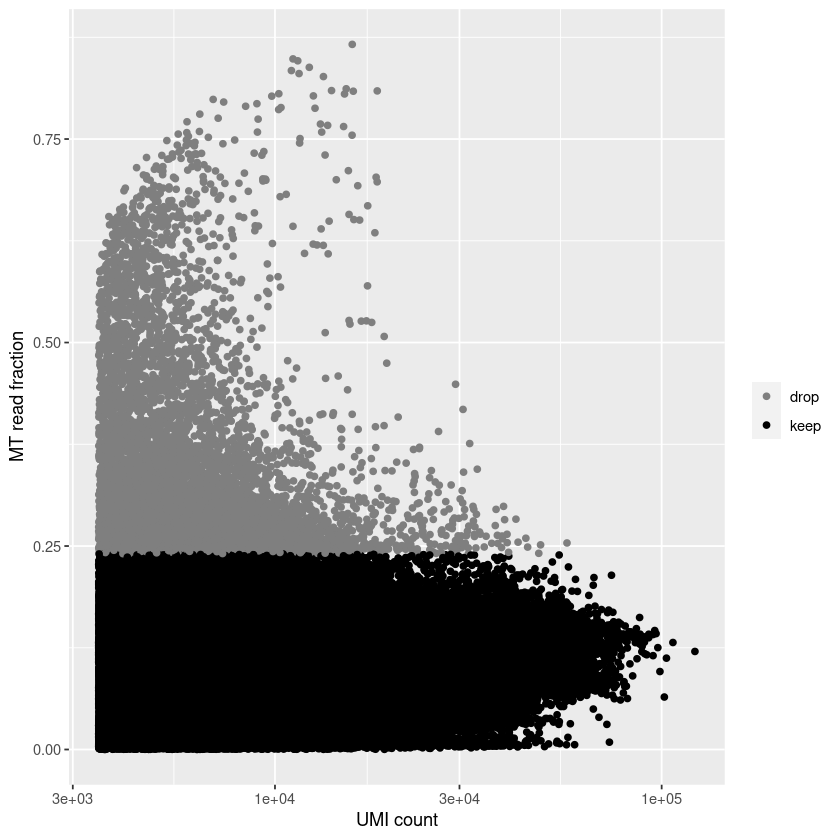



|Sample |  Total| Dropped| Retained|
|:------|------:|-------:|--------:|
|1      |   2981|      97|     2884|
|2      |   4103|     214|     3889|
|3      |   3524|      63|     3461|
|4      |   2081|      52|     2029|
|5      |   3787|     123|     3664|
|6      |   2507|      73|     2434|
|7      |   6306|     353|     5953|
|8      |   6754|     293|     6461|
|9      |   9552|     860|     8692|
|10     |  12823|    1576|    11247|
|11     |   9041|    1208|     7833|
|12     |   1299|       0|     1299|
|13     |   7148|       8|     7140|
|14     |   6107|      13|     6094|
|15     |  12345|     882|    11463|
|16     |   1896|       1|     1895|
|17     |   6804|       5|     6799|
|18     |   6694|       6|     6688|
|19     |  12547|    1191|    11356|
|20     |   6839|       6|     6833|
|21     |   6411|      12|     6399|
|22     |   8676|     571|     8105|
|23     |  10752|       8|    10744|
|24     |  11479|      13|    11466|
|25     |  12834|       8|    12826|

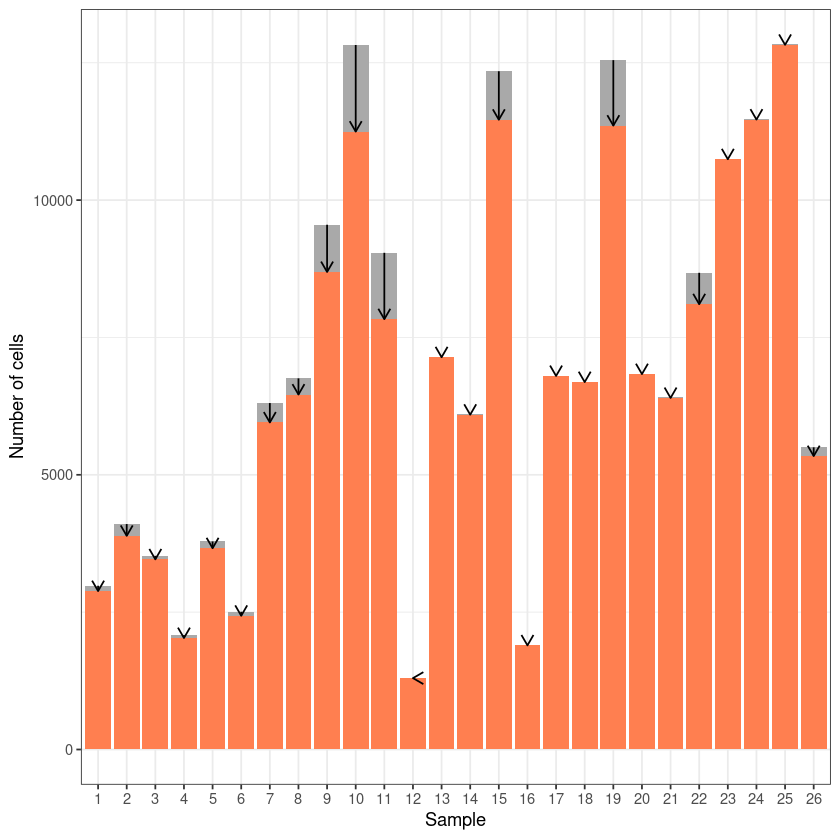

In [11]:
##==Filter cells based on high MT fraction (stressed, apoptotic cells)==##

rabbit_ensembl = useEnsembl("ensembl",dataset="ocuniculus_gene_ensembl", mirror = "useast")
genemap <- getBM(attributes=c("ensembl_gene_id",  "chromosome_name"), values = genes, mart = rabbit_ensembl)


mt.counts = counts[which(genes[,1] %in% genemap$ensembl_gene_id[genemap$chromosome_name=="MT"]), mart=rabbit_ensembl]
mt.fraction = colSums(mt.counts)/lib.sizes

mt.fraction

mt.p = pnorm(mt.fraction, mean = median(mt.fraction), sd = mad(mt.fraction), lower.tail = FALSE)
mt.lim = min(mt.fraction[which(p.adjust(mt.p, method = "fdr") < 0.05)])

qplot(lib.sizes, mt.fraction, col = ifelse(mt.fraction>mt.lim, "drop", "keep")) +
  scale_x_log10() +
  labs(x = "UMI count", y = "MT read fraction") +
  scale_color_manual(values = c("drop" = "grey50", "keep" = "black"), name = "")

#=print fraction of mitochondrial count. Rabbit cells are known to have a higher MT fraction that mouse either due to genome annotation or biological reasons=#
mt_drop = plot_change(barcodes, logical_keep = mt.fraction<mt.lim )

print(mt_drop$plot)

#drop cells outside 0.05 fdr of mitochondrial fraction#
kable(mt_drop$df, caption = "Cells dropped according to mitochondrial fraction threshold", row.names = FALSE)

In [19]:
counts = counts[, mt.fraction < mt.lim]
barcodes = barcodes[mt.fraction < mt.lim]
mt.fraction = mt.fraction[mt.fraction < mt.lim]

lib.sizes = colSums(counts)
n.genes = colSums(counts>0)

mt.lim

[1] 0.2403801

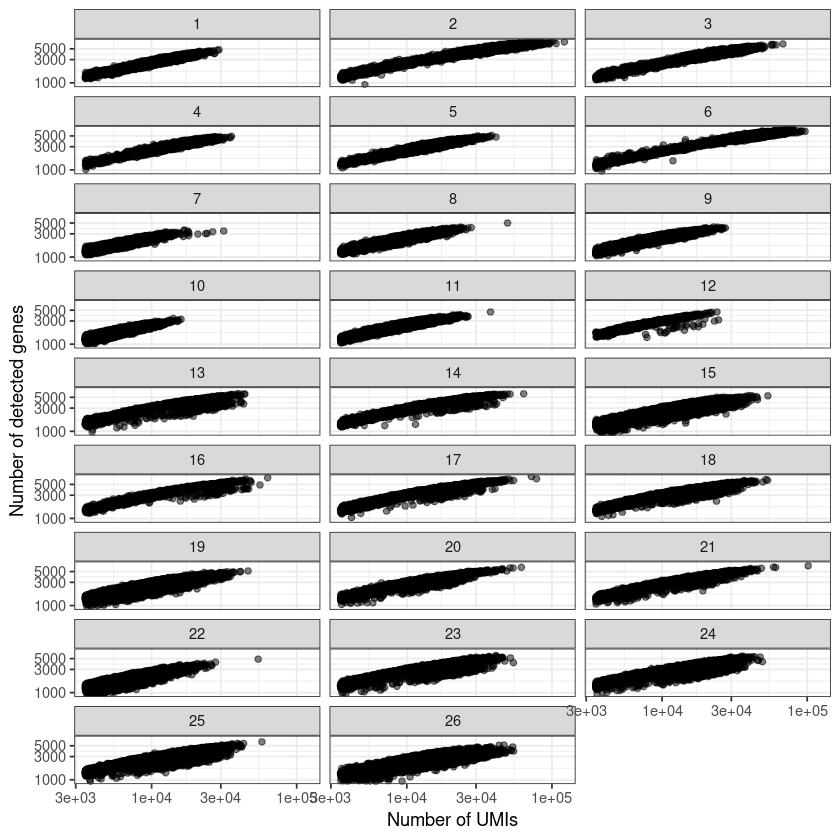

In [13]:
split_bc = strsplit(as.character(barcodes), "-", fixed = T)
bcs = sapply(split_bc, function(x) x[1])
samples = sapply(split_bc, function(x) x[2])

plot_df = data.frame(lib = lib.sizes, genes = n.genes, sample = samples)
plot_df = plot_df[sample(nrow(plot_df), nrow(plot_df), replace = FALSE),]

p = ggplot(plot_df, aes(x = lib, y = genes)) +
  geom_point(alpha = 0.5) +
  scale_colour_Publication() +
  scale_y_log10() +
  scale_x_log10() +
  theme_bw() +
  facet_wrap(~factor(sample, levels = unique(sample)[order(nchar(unique(as.character(sample))), unique(sample))]), ncol = 3) +
  labs(x = "Number of UMIs", y = "Number of detected genes")
                 
suppressWarnings(plot(p))

In [15]:
lib.sizes = colSums(counts)
n.genes = colSums(counts>0)

split_bc = strsplit(as.character(barcodes), "-", fixed = T)
bcs = sapply(split_bc, function(x) x[1])
samples = sapply(split_bc, function(x) x[2])

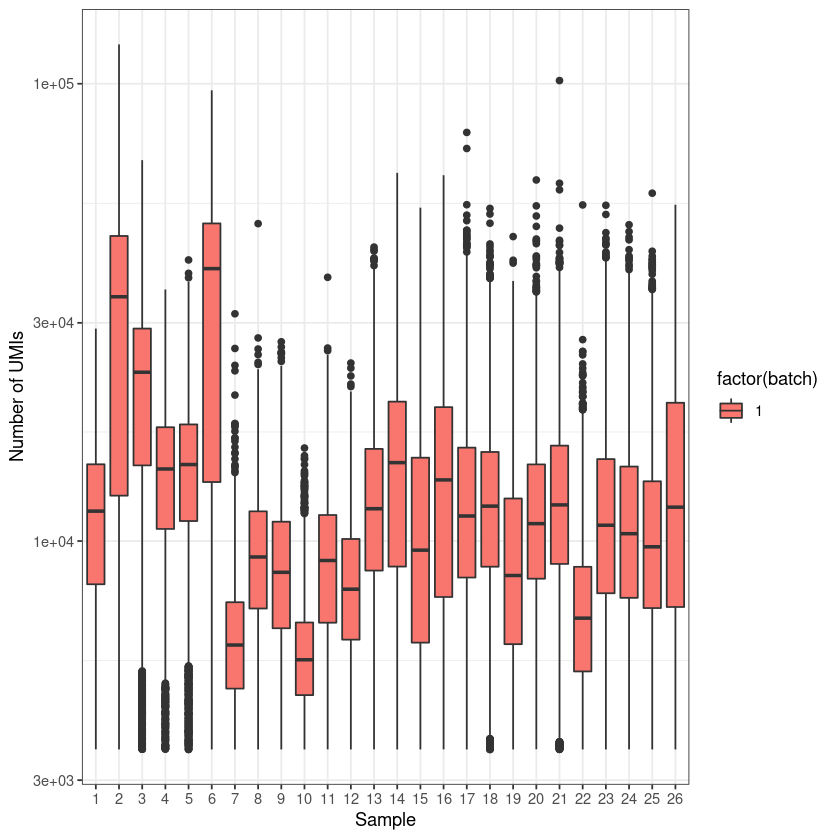

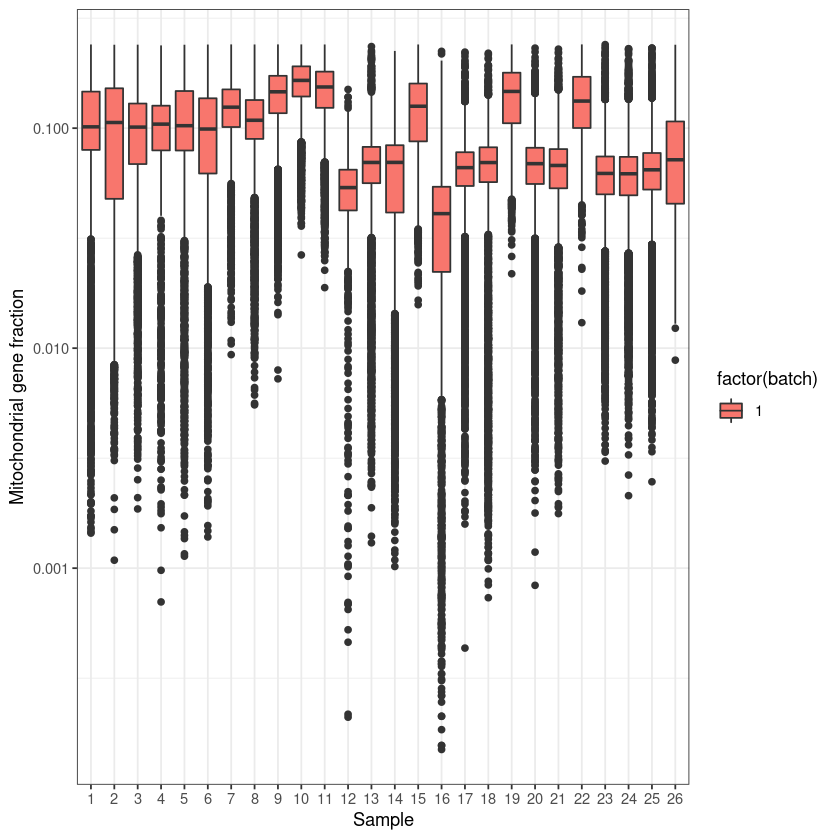

In [16]:
## Visualize UMI and MT fraction by sequencing batch ##

batch = sapply(samples, function(x){
  if(x %in% 1:26){
    return(1)
  } else{
    return(NA)
  }
})

p = ggplot(data.frame(lib = lib.sizes, sample = samples), aes (x = factor(sample, levels = unique(sample)), 
                                                           y = lib.sizes, fill = factor(batch))) +
  geom_boxplot() +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Sample", y = "Number of UMIs")+
  scale_color_brewer(palette = "Set1", name = "Sequencing\nbatch")

suppressWarnings(plot(p))

p = ggplot(data.frame(mt = mt.fraction, sample = samples), aes (x = factor(sample, levels = unique(sample)), 
                                                           y = mt, fill = factor(batch))) +
  geom_boxplot() +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Sample", y = "Mitochondrial gene fraction") +
  scale_color_brewer(palette = "Set1", name = "Sequencing\nbatch")

#visualize the  range of UMIs per sample alongside the MT fraction of cells retained
suppressWarnings(plot(p))

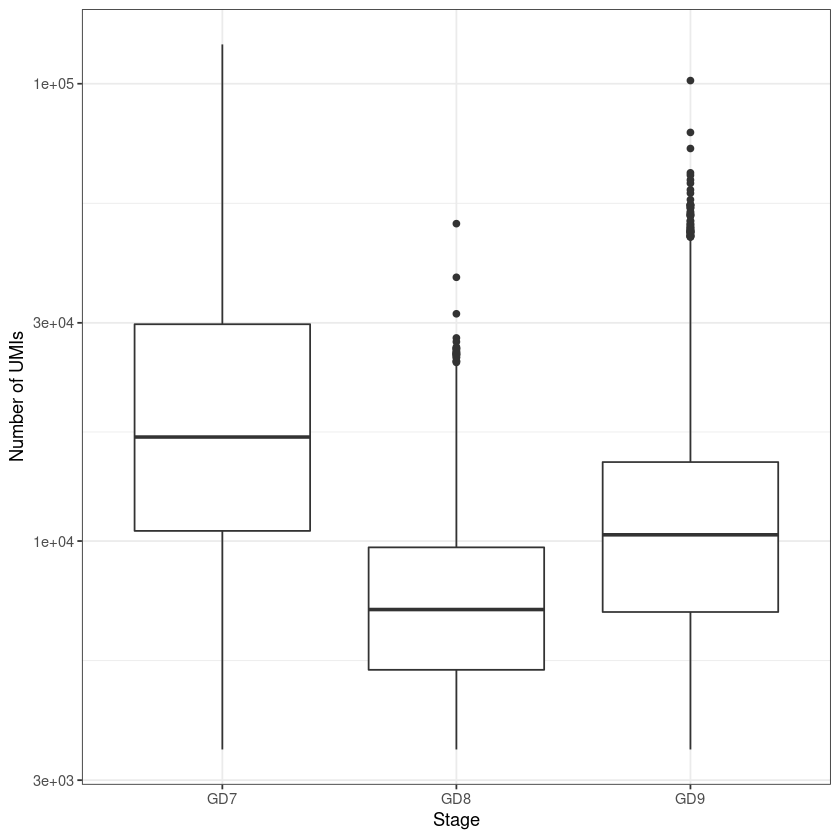

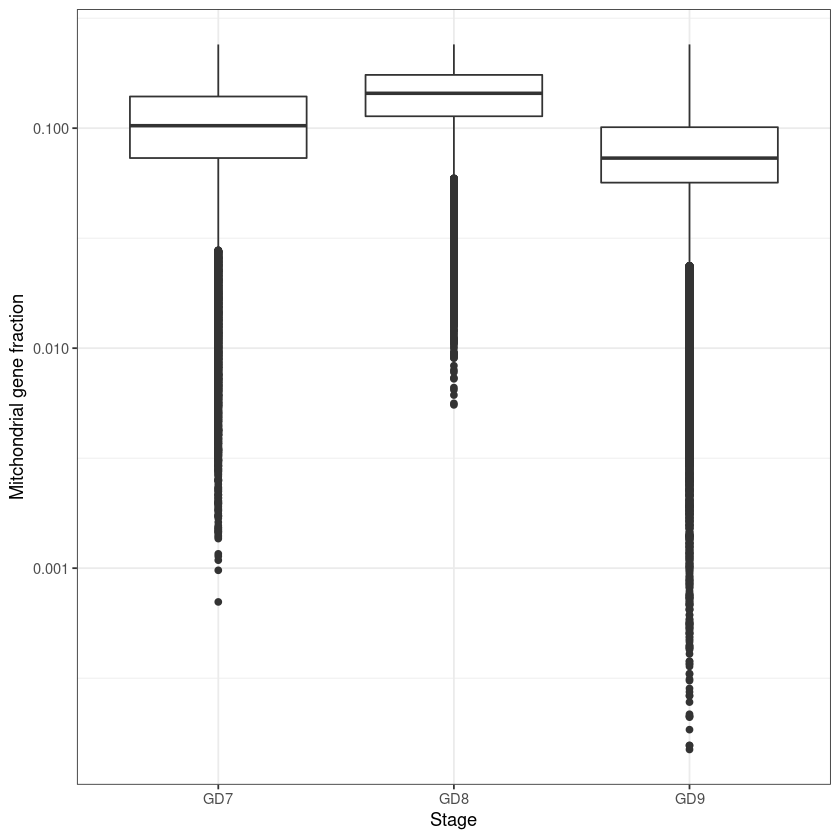

In [17]:
## Visualize UMI and MT fraction by stage ##

stage_match = read.table("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT04_rabbit/sample_stage_map_rabbit.csv", sep = ",", header = TRUE)

pdf = data.frame(mt = mt.fraction, sample = samples, lib.size = lib.sizes, stage = stage_match$stage[match(samples, stage_match$sample)])

p = ggplot(pdf, aes(x = factor(stage), y= lib.size)) +
  geom_boxplot() +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Stage", y = "Number of UMIs")

suppressWarnings(plot(p))

p = ggplot(pdf, aes(x = factor(stage), y=mt.fraction)) +
  geom_boxplot() +
  theme_bw() +
  scale_y_log10() +
  labs(x = "Stage", y = "Mitchondrial gene fraction")

#these differences are due to the difference between actual capture and estimated cell numbers
#variation mostly due to the sequencing depth per cell due to actual/estimated (aiming for 35-50k reads per cell)

suppressWarnings(plot(p))

In [18]:
## Final cells retained for analysis and compiling variables for saving

split_bc = strsplit(as.character(barcodes), "-", fixed = T)
bcs = sapply(split_bc, function(x) x[1])
samples = sapply(split_bc, function(x) x[2])

meta = data.frame(cell = paste0("cell_", 1:ncol(counts)),
                  barcode = bcs,
                  sample = as.numeric(samples),
                  stage = stage_match$stage[match(samples, stage_match$sample)],
                  batch = stage_match$batch[match(samples, stage_match$sample)])

tab = as.matrix(table(meta$sample, meta$stage))

new_rownames = c("Total", rownames(tab))
tab = rbind(sapply(colnames(tab), function(x) sum(meta$stage == x)),
            tab)
rownames(tab) = new_rownames

# after QC, these are the numbers of cells retained per sample
            
pt = kable(tab, caption = "Number of cells retained for analysis")
pt



|      |   GD7|   GD8|    GD9|
|:-----|-----:|-----:|------:|
|Total | 18361| 40186| 114448|
|1     |  2884|     0|      0|
|2     |  3889|     0|      0|
|3     |  3461|     0|      0|
|4     |  2029|     0|      0|
|5     |  3664|     0|      0|
|6     |  2434|     0|      0|
|7     |     0|  5953|      0|
|8     |     0|  6461|      0|
|9     |     0|  8692|      0|
|10    |     0| 11247|      0|
|11    |     0|  7833|      0|
|12    |     0|     0|   1299|
|13    |     0|     0|   7140|
|14    |     0|     0|   6094|
|15    |     0|     0|  11463|
|16    |     0|     0|   1895|
|17    |     0|     0|   6799|
|18    |     0|     0|   6688|
|19    |     0|     0|  11356|
|20    |     0|     0|   6833|
|21    |     0|     0|   6399|
|22    |     0|     0|   8105|
|23    |     0|     0|  10744|
|24    |     0|     0|  11466|
|25    |     0|     0|  12826|
|26    |     0|     0|   5341|

In [20]:
##Save files to for the next step of the pipeline adapted from Pijuan-Sala et al. 2019##

null_holder = writeMM(counts, file = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/raw_counts.mtx")
saveRDS(as(counts, "dgCMatrix"), file = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/raw_counts.rds")
write.table(barcodes, file = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/barcodes.tsv", row.names = F, col.names = F, quote = F, sep = "\t")

ERROR: Error in write.table(meta, fsdile = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/meta.tab", : unused argument (fsdile = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/meta.tab")


In [21]:
write.table(meta, file = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/meta.tab", row.names = F, col.names = T, quote = F, sep = "\t")

In [22]:
##Optional: Save workspace if need to revisit this later without rerunning from scratch##

save.image("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/workspace.RData")

In [2]:
#load data using this#
load("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/3_cellqc/workspace.RData")

In [3]:
#summary statistics for the number of genes in these two instances they're called#
summary(ngenes)
summary(n.genes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    901    1918    2543    2664    3238    7257 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    905    1974    2589    2707    3271    7257 